In [29]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import sys  
sys.path.append( '..')

In [31]:
from src.stocks import build_model

In [32]:
stock_names = ["RELIANCE.NS", "TCS.NS"]

In [33]:
build_n_forecast(stock_names)

/Users/ravinarukulla/PycharmProjects/stock_forecast/venv/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:28:46] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


mean Square error in train data: 10.422325946966579


/Users/ravinarukulla/PycharmProjects/stock_forecast/venv/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [11:28:47] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


mean Square error in train data: 23.5919554444819


,Date,forecast,Stock
0,2024-03-12,2924.918213,RELIANCE.NS
0,2024-03-12,3996.579834,TCS.NS


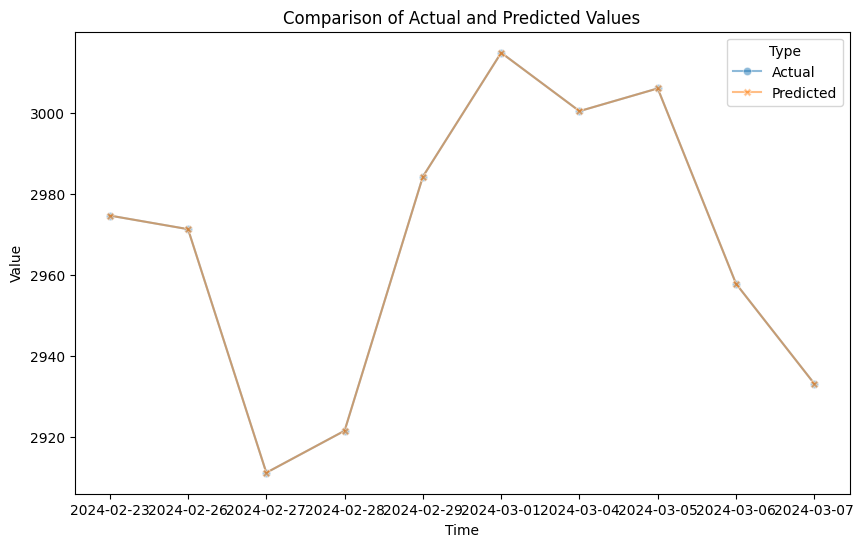

In [14]:

plot_df = pd.concat([y,y_pred],axis='columns')

plot_df = plot_df.rename(columns={'Close_next_1d':'Actual',0:'Predicted'}).reset_index(names='Date').tail(10)

# Melt the DataFrame to long-format for easier plotting with Seaborn
data_long = plot_df.melt(id_vars=['Date'],value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Value')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_long, x=data_long.Date, y='Value', hue='Type', style='Type',
             markers=True, dashes=False, alpha=0.5)  # Adjust transparency with the alpha parameter

plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(title='Type')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y.tail(10))
plt.plot(y_pred[-10:])
plt.show()

In [ ]:

plt.plot(y.tail(10))
plt.plot(y_pred[-10:])
plt.show()

In [ ]:
imp = pd.DataFrame(xgb_model.feature_importances_,index=X.columns,columns=["imp_score"]).sort_values("imp_score",ascending=False)

In [ ]:
xgb.plot_importance(xgb_model,importance_type='gain',max_num_features=20,height=0.5)